In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [505]:
df = pd.read_csv("/content/laptop_price.csv",encoding = 'latin')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [506]:
df.shape

(1303, 13)

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [508]:
df.sample(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
951,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.0
22,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.0
417,424,HP,EliteBook 1040,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.43kg,1500.0


In [509]:
df.drop(columns =['laptop_ID'],inplace = True)

In [510]:
df.drop(columns =['Product'],inplace = True)

In [511]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [512]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [513]:
df.duplicated().sum()

29

In [514]:
df.drop_duplicates(inplace = True)

In [515]:
df.shape

(1274, 11)

In [516]:
df['Price'] = round(df['Price_euros']*89.66).astype('int')

In [517]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120117
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80599
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51554
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,227508
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,161711


In [518]:
1339.69 * 89.66   #price conversion check

120116.6054

In [519]:
df.drop(columns =['Price_euros'],inplace = True)

In [520]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
857,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,229440


#EDA

<Axes: xlabel='Company'>

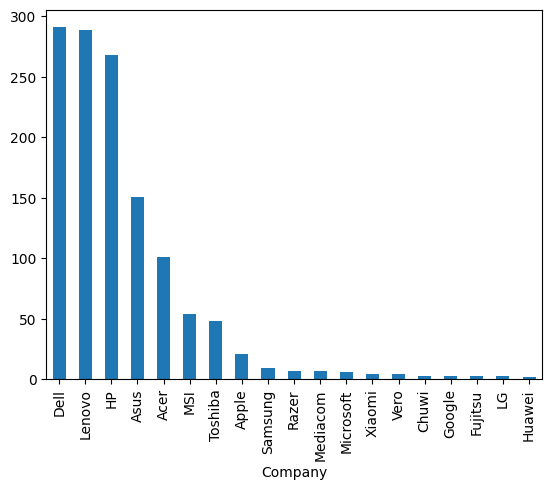

In [521]:
# Before filtering
df['Company'].value_counts().plot(kind = 'bar')

In [522]:
#Groupby to get the average amount of each brand
df.groupby('Company')['Price'].mean()

,Price
Company,
Acer,56796.415842
Apple,140246.142857
Asus,101210.741722
Chuwi,28179.666667
Dell,107522.474227
Fujitsu,65362.000000
Google,150419.333333
HP,96860.981343
Huawei,127675.500000


In [523]:
# Filtering for only those companies which has repeat more then 10 times in the dataset to reduce the category in the data and assigning back to df
df = df[df.groupby('Company')['Company'].transform('count') > 10]

<Axes: xlabel='Company'>

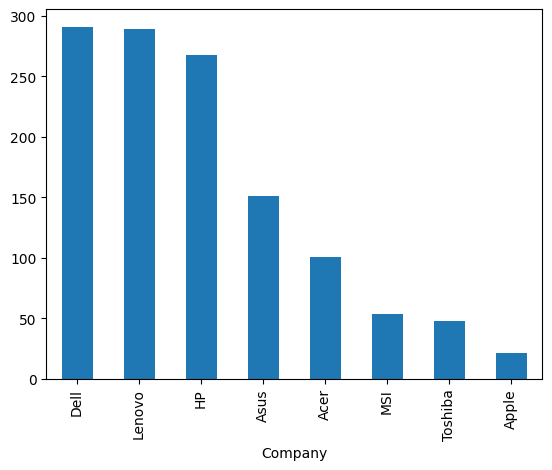

In [524]:
# After filtering
df['Company'].value_counts().plot(kind = 'bar')

In [525]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,120117
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80599
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51554
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227508
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161711


In [526]:
df.reset_index(drop = True,inplace = True)

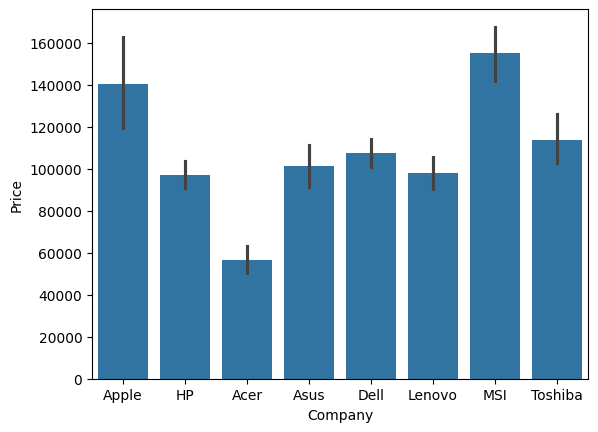

In [527]:
sns.barplot(x = 'Company',y = 'Price',data = df)
plt.show()

In [528]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
81,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4GB,128GB SSD,AMD R4 Graphics,Windows 10,2.2kg,35774


In [529]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,687
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


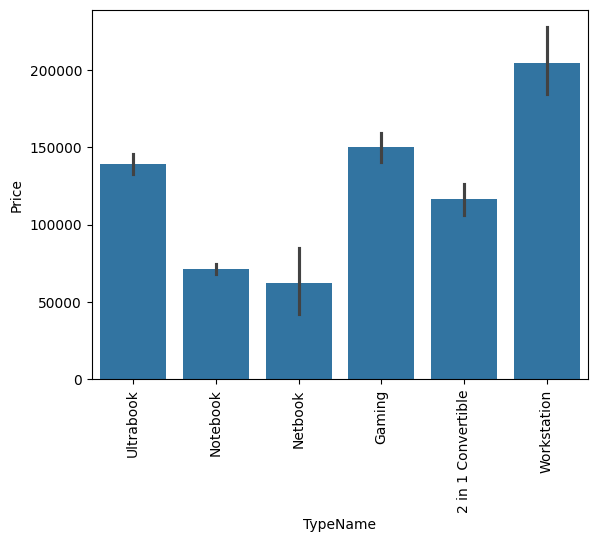

In [530]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [531]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


<Axes: xlabel='Inches'>

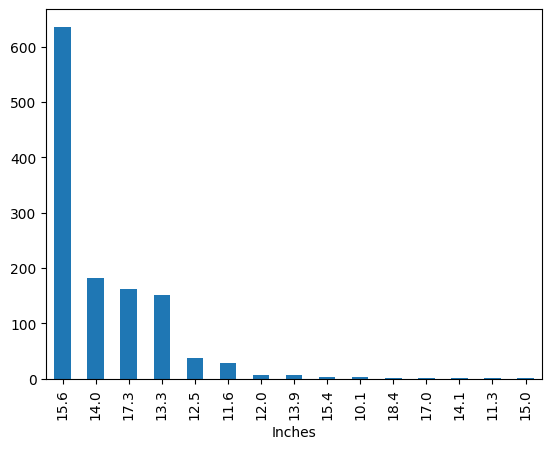

In [532]:
df['Inches'].value_counts().plot(kind='bar')

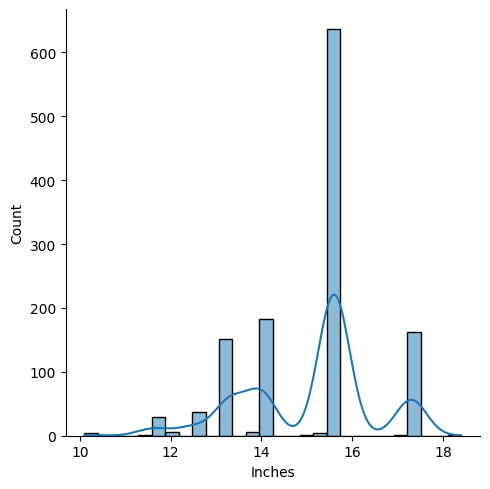

In [533]:
sns.displot(df['Inches'],kde=True)

1. The smooth curve overlays the histogram and represents the estimated
probability density function.

2. Peaks in the curve indicate where the data points are concentrated.

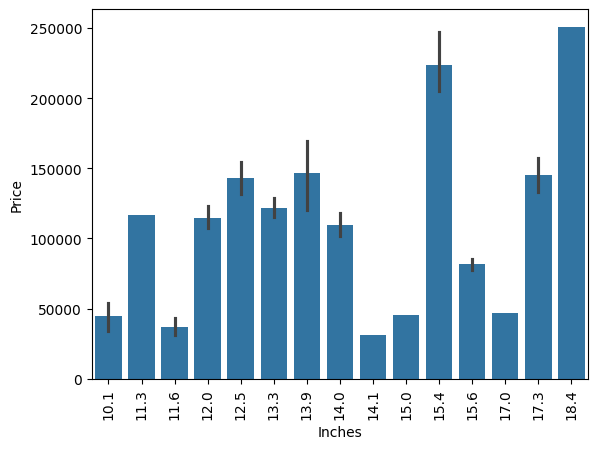

In [534]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

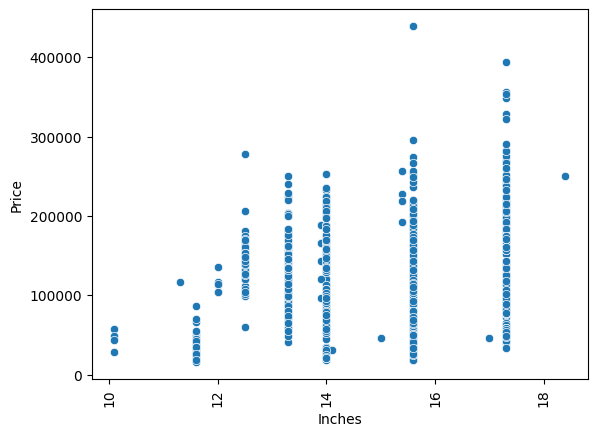

In [535]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [536]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,492
1366x768,257
IPS Panel Full HD 1920x1080,217
IPS Panel Full HD / Touchscreen 1920x1080,48
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [537]:
# X_Res
# Y_Res

In [538]:
a = 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160'
type(a)

str

In [539]:
a.split()

['IPS', 'Panel', 'Touchscreen', '/', '4K', 'Ultra', 'HD', '3840x2160']

In [540]:
a.split()[-1].split('x')

['3840', '2160']

In [541]:
a.split()[-1].split('x')[0]

'3840'

In [542]:
a.split()[-1].split('x')[1]

'2160'

In [543]:
(lambda x : x.split()[-1].split('x')[0])('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

'3840'

In [544]:
(lambda x : x.split()[-1].split('x')[1])('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

'2160'

In [545]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
400,Lenovo,Notebook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.15kg,27297


In [546]:
df['X_Res'] = df['ScreenResolution'].apply(lambda x : x.split()[-1].split('x')[0]).astype('int')

In [547]:
df['Y_Res'] = df['ScreenResolution'].apply(lambda x : x.split()[-1].split('x')[1]).astype('int')

In [548]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res
770,HP,Notebook,15.6,1366x768,AMD A12-Series 9700P 2.5GHz,8GB,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04kg,56396,1366,768


In [549]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,492
1366x768,257
IPS Panel Full HD 1920x1080,217
IPS Panel Full HD / Touchscreen 1920x1080,48
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [550]:
a = 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160'

In [551]:
(lambda a :1 if "Touchscreen" in a else 0)('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

1

In [552]:
(lambda a :1 if "IPS" in a else 0)('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

1

In [553]:
df['Touchscreen'] = df['ScreenResolution'].apply((lambda a :1 if "Touchscreen" in a else 0))

In [554]:
df['IPS'] = df['ScreenResolution'].apply((lambda a :1 if "IPS" in a else 0))

In [555]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
914,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,34878,1366,768,1,1


In [556]:
df.drop(columns = ['ScreenResolution'],inplace = True)

In [557]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,120117,2560,1600,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80599,1440,900,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51554,1920,1080,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227508,2880,1800,0,1
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161711,2560,1600,0,1


In [558]:
df.shape

(1223, 14)

In [559]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
714,Acer,Notebook,14.0,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.68kg,29588,1366,768,0,0


In [560]:
df['Cpu']

,Cpu
0,Intel Core i5 2.3GHz
1,Intel Core i5 1.8GHz
2,Intel Core i5 7200U 2.5GHz
3,Intel Core i7 2.7GHz
4,Intel Core i5 3.1GHz
...,...
1218,Intel Core i7 6500U 2.5GHz
1219,Intel Core i7 6500U 2.5GHz
1220,Intel Core i7 6500U 2.5GHz
1221,Intel Celeron Dual Core N3050 1.6GHz


<Axes: xlabel='Cpu'>

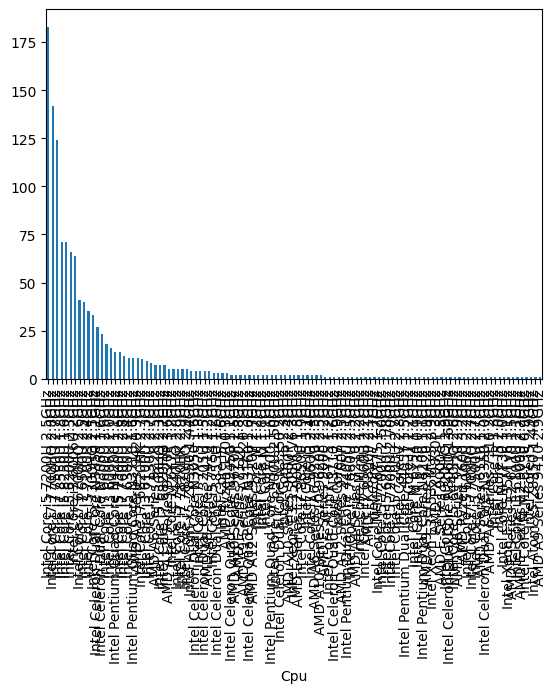

In [561]:
df['Cpu'].value_counts().plot(kind='bar')

In [562]:
# I have fetched the first 3 words i.e Intel Core i5/i7/i3....
# I just have fetched the Series of AMD i.e E/A/D....
# Wherever i have somtheing like (Intel Celeron Dual Core N3050 1.6GHz/Intel Pentium / Intel Quad ) I categorized it as intel CPU

In [563]:
a = 'Intel Core i5 7200U 2.5GHz'

In [564]:
a.split()

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [565]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [566]:
# Intel core i5

In [567]:
" ".join(a.split()[0:3])

'Intel Core i5'

In [568]:
(lambda a : " ".join(a.split()[0:3]))('Intel Core i5 7200U 2.5GHz')

'Intel Core i5'

In [569]:
df['Cpu'] = df['Cpu'].apply(lambda a : " ".join(a.split()[0:3]))

In [570]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,493
Intel Core i5,411
Intel Core i3,134
Intel Celeron Dual,65
Intel Pentium Quad,27
Intel Core M,16
AMD A9-Series 9420,12
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [571]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    if text[4] == 'E':
      return 'AMD E Series Processor'
    elif text[4] == 'A':
      return 'AMD A Series Processor'
    elif text[4] == 'D':
      return 'AMD D Series Processor'
    elif text[4] == 'F':
      return 'AMD F Series Processor'
    else:
      return 'AMD Ryzen Series'

In [572]:
fetch_processor(df['Cpu'][5])

'AMD A Series Processor'

In [573]:
df['Cpu'] =  df['Cpu'].apply(fetch_processor)

In [574]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,493
Intel Core i5,411
Intel Core i3,134
Other Intel Processor,125
AMD A Series Processor,45
AMD E Series Processor,9
AMD Ryzen Series,4
AMD F Series Processor,2


<Axes: xlabel='Cpu'>

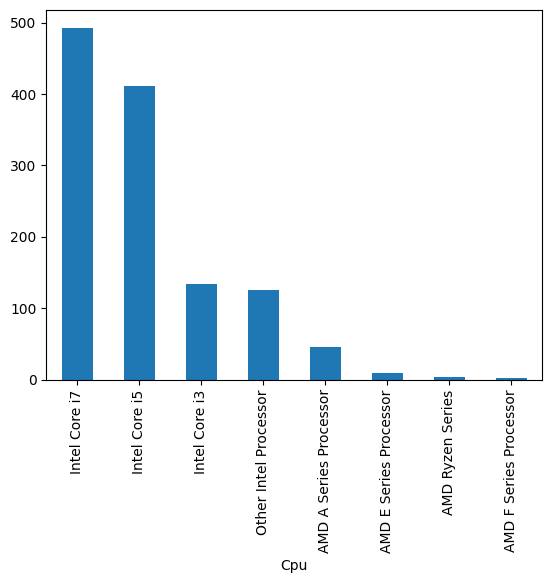

In [575]:
df['Cpu'].value_counts().plot(kind='bar')

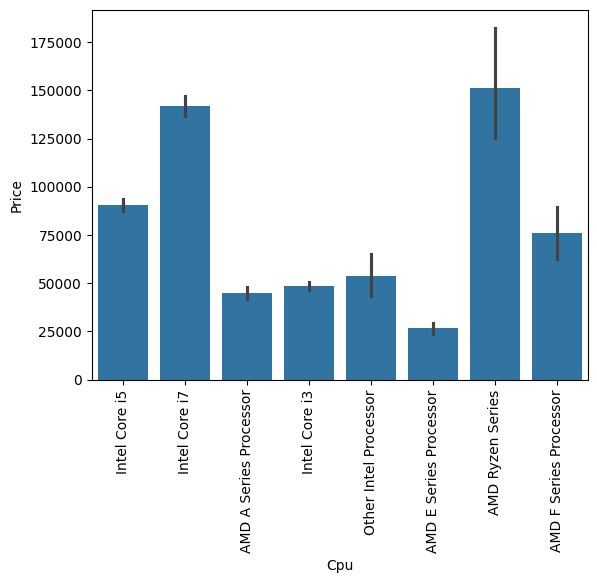

In [576]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [577]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
548,HP,Workstation,17.3,Intel Core i5,8GB,500GB HDD,Nvidia Quadro M1200,Windows 10,3.14kg,166856,1600,900,0,0


In [578]:
df['Ram'].value_counts()

,count
Ram,
8GB,595
4GB,350
16GB,186
6GB,34
12GB,25
32GB,15
2GB,14
24GB,3
64GB,1


In [579]:
a = '4GB'

In [580]:
a.replace("GB","")

'4'

In [581]:
df['Ram'] = df['Ram'].apply(lambda a : a.replace("GB","")).astype('int')

<Axes: xlabel='Ram'>

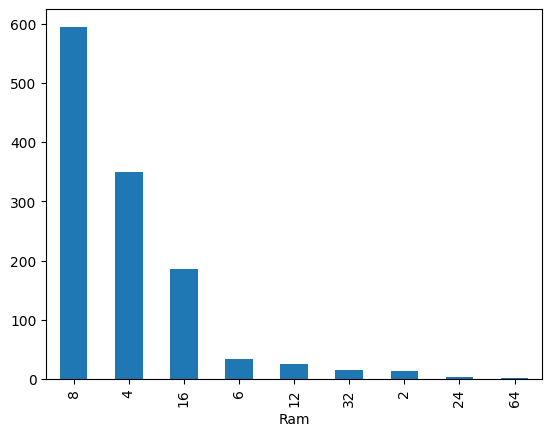

In [582]:
df['Ram'].value_counts().plot(kind='bar')

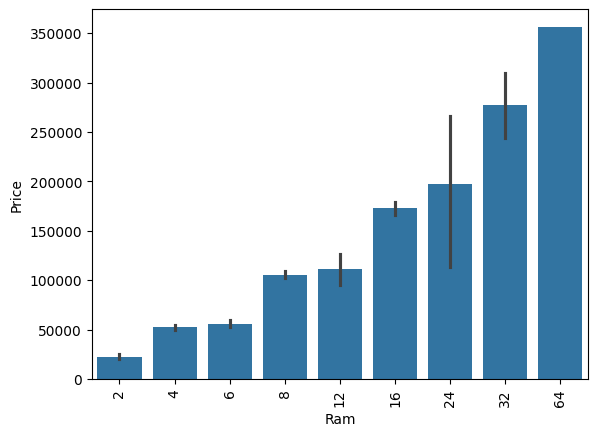

In [583]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [584]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
749,MSI,Gaming,14.0,Intel Core i7,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.6kg,169547,1920,1080,0,1


In [585]:
# SSD
# HDD
# SSD+HDD
# Flash Storage
# SSD + SSD
# Flash Storage + HdD
# SSD + Hybrid
# HDD + HHD
df['Memory'].value_counts()

,count
Memory,
256GB SSD,393
1TB HDD,214
500GB HDD,123
512GB SSD,105
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,29
2TB HDD,16


In [586]:
df.drop(columns = ['Memory'], inplace = True)

In [587]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
857,Dell,2 in 1 Convertible,13.3,Intel Core i7,8,Intel HD Graphics 615,Windows 10,1.24kg,180495,3200,1800,1,0


In [588]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,265
Intel HD Graphics 520,179
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,65
Nvidia GeForce GTX 1060,45
...,...
Intel Graphics 620,1
AMD Radeon R5 520,1
AMD Radeon R7,1


In [589]:
a = 'Intel HD Graphics 620'

In [590]:
a.split()[0:2]

['Intel', 'HD']

In [591]:
" ".join(a.split()[0:2])

'Intel HD'

In [592]:
lambda a : " ".join(a.split()[0:2])

<function __main__.<lambda>(a)>

In [593]:
df['Gpu'] = df['Gpu'].apply(lambda a : " ".join(a.split()[0:2]))

In [594]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,585
Nvidia GeForce,353
AMD Radeon,166
Intel UHD,68
Nvidia Quadro,31
Intel Iris,11
AMD FirePro,5
AMD R4,1
Nvidia GTX,1


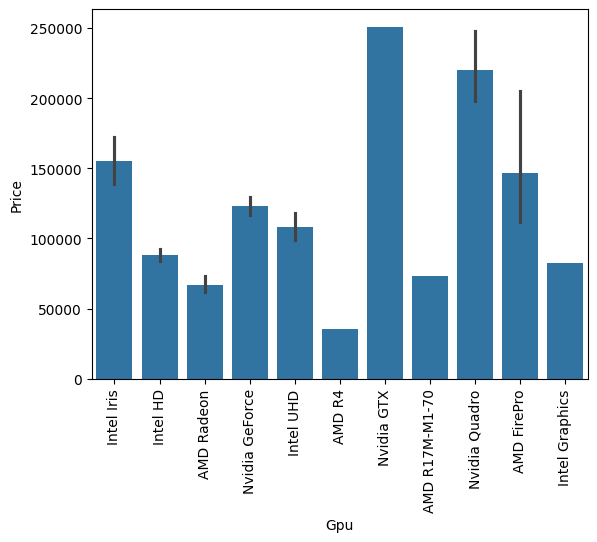

In [595]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [596]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
632,Dell,Notebook,14.0,Intel Core i5,8,Intel HD,Windows 10,1.56kg,110192,1920,1080,0,0


In [597]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1010
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,13
Mac OS X,8
Android,2
Windows 10 S,2


In [598]:
#Wherever we have windows 10 or windows 10 S >>> Windows 10
#Windows 7 >>> Windows 7
#If we have Mac OS X or macOS >>> Mac oS
#If No OS  >>> No OS
#Chrome/Linux/Android

In [599]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Windows 10'
  elif text == 'Windows 7':
    return 'Windows 7'
  elif text == 'Mac OS X' or text == 'macOS':
    return 'Mac OS'
  elif text == 'No OS':
    return 'No OS'
  else:
    return 'Chrome/Linux/Android'

In [600]:
os('Linux')

'Chrome/Linux/Android'

In [601]:
df['OpSys'] = df['OpSys'].apply(os)

In [602]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1012
Chrome/Linux/Android,82
No OS,63
Windows 7,45
Mac OS,21


<Axes: xlabel='OpSys'>

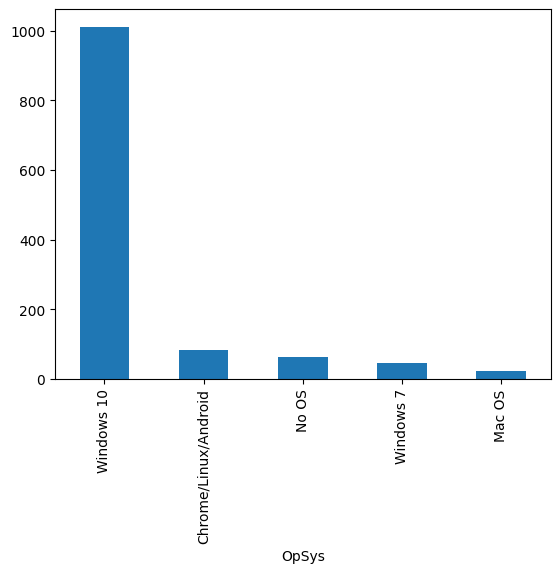

In [603]:
df['OpSys'].value_counts().plot(kind='bar')

In [604]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,Mac OS,1.37kg,120117,2560,1600,0,1
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel HD,Mac OS,1.34kg,80599,1440,900,0,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel HD,No OS,1.86kg,51554,1920,1080,0,0
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD Radeon,Mac OS,1.83kg,227508,2880,1800,0,1
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,Mac OS,1.37kg,161711,2560,1600,0,1


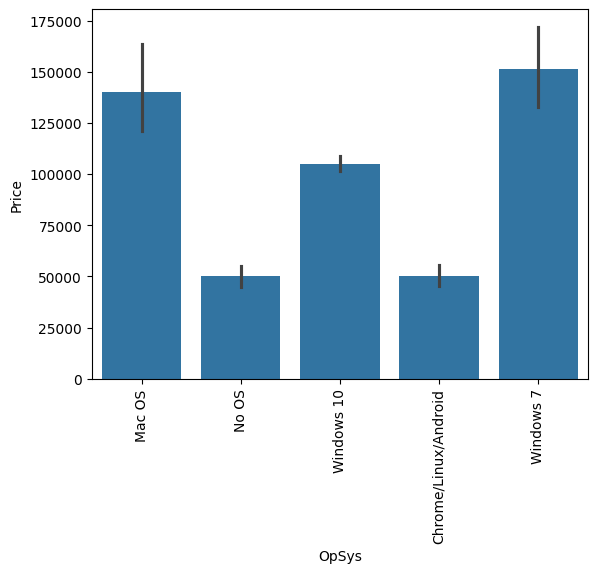

In [605]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [606]:
df.shape

(1223, 13)

In [607]:
df['Weight'] = df['Weight'].apply(lambda a : a.replace("kg","")).astype('float')

In [608]:
df['Weight'].describe()

,Weight
count,1223.000000
mean,2.063092
std,0.664123
min,0.690000
25%,1.595000
50%,2.060000
75%,2.320000
max,4.700000


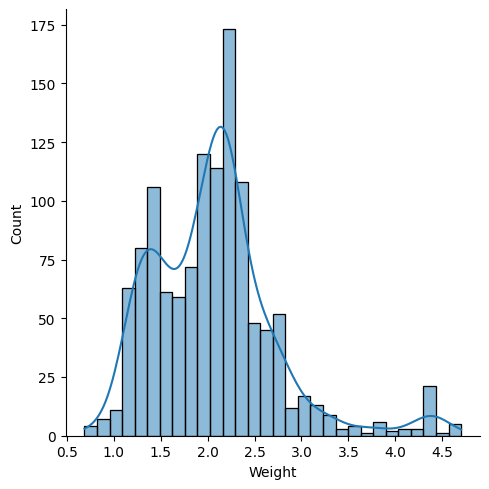

In [609]:
sns.displot(x=df['Weight'],kde=True)
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

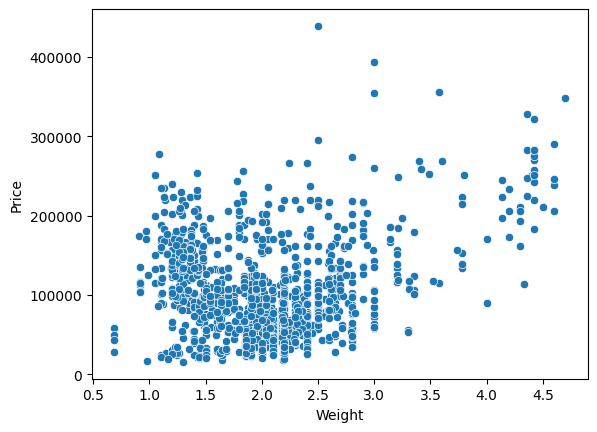

In [610]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [611]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS
182,Lenovo,Gaming,15.6,Intel Core i5,8,Nvidia GeForce,No OS,2.4,69845,1920,1080,0,1


In [612]:
df['Y_Res'].value_counts()

,count
Y_Res,
1080,805
768,284
2160,39
1800,29
1440,29
900,27
1600,6
1200,4


In [613]:
df.corr(numeric_only=True)['Price'] #

,Price
Inches,0.055710
Ram,0.726436
Weight,0.212342
Price,1.000000
X_Res,0.553264
Y_Res,0.552521
Touchscreen,0.161168
IPS,0.288850


In [614]:
#ppi Pixels per inches
df['ppi']= round(((df['X_Res']**2) + (df['Y_Res']**2))**0.5 /df['Inches'])

In [615]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,IPS,ppi
770,HP,Notebook,15.6,AMD A Series Processor,8,AMD Radeon,Windows 10,2.04,56396,1366,768,0,0,100.0


In [616]:
df.corr(numeric_only=True)['Price']

,Price
Inches,0.055710
Ram,0.726436
Weight,0.212342
Price,1.000000
X_Res,0.553264
Y_Res,0.552521
Touchscreen,0.161168
IPS,0.288850
ppi,0.483307


In [617]:
df.shape

(1223, 14)

In [618]:
df.drop(columns = ['Inches','X_Res','Y_Res'],inplace = True)

In [619]:
df.shape

(1223, 11)

<Axes: xlabel='ppi', ylabel='Price'>

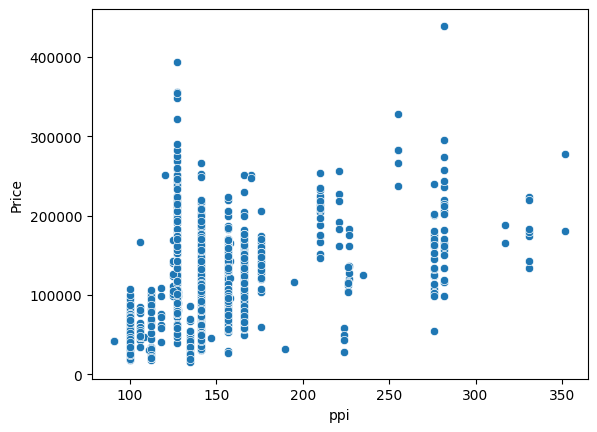

In [620]:
sns.scatterplot(x =df['ppi'], y = df['Price'])

In [621]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1054
1,169


<Axes: xlabel='Touchscreen'>

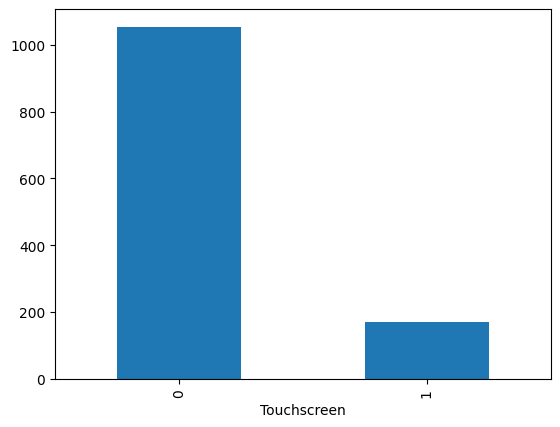

In [622]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

In [623]:
df['IPS'].value_counts()

,count
IPS,
0,884
1,339


<Axes: xlabel='Touchscreen', ylabel='Price'>

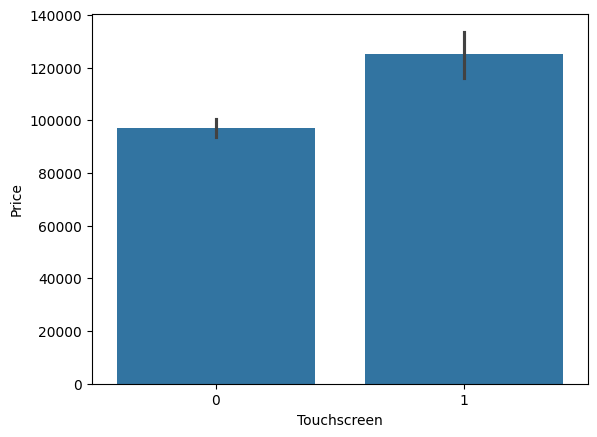

In [624]:
sns.barplot(x = df['Touchscreen'],y = df['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

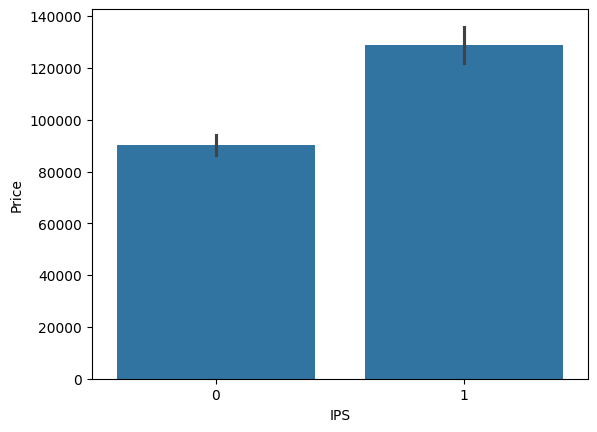

In [625]:
sns.barplot(x = df['IPS'],y = df['Price'])

In [626]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Mac OS,1.37,120117,0,1,227.0
1,Apple,Ultrabook,Intel Core i5,8,Intel HD,Mac OS,1.34,80599,0,0,128.0
2,HP,Notebook,Intel Core i5,8,Intel HD,No OS,1.86,51554,0,0,141.0
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon,Mac OS,1.83,227508,0,1,221.0
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Mac OS,1.37,161711,0,1,227.0


In [627]:
df['ppi'].describe()

,ppi
count,1223.000000
mean,145.513491
std,42.112035
min,91.000000
25%,127.000000
50%,141.000000
75%,157.000000
max,352.000000


In [628]:
# Exporting the cleaned data in csv format
df.to_csv("Cleaned_data.csv")

#Conclusion :
This project successfully cleaned and analyzed the laptop price dataset. Key factors influencing price include brand, processor, RAM, screen features, and storage. These insights can be used to build a model for predicting laptop prices.